In [12]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from pyACC.clustering import get_power_spectrum, generate_gaussian_map

import camb 
from scipy.interpolate import interp1d

In [13]:
Omega_b = 0.05
Omega_c = 0.25

h=0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

pars.set_matter_power(redshifts=[10.], kmax=100.0)
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 1000)

In [14]:
pk_func = interp1d(kh, pk[0], fill_value='extrapolate', kind='cubic')

In [15]:
#Define the box
side = 500 #Mpc/h
spacing = 5 #Mpc/h

In [16]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)
delta_k.shape
delta_x.shape

(100, 100, 100)

(array([2.00000e+00, 1.70000e+01, 3.70000e+01, 1.39000e+02, 4.41000e+02,
        1.20900e+03, 3.20800e+03, 7.20400e+03, 1.48230e+04, 2.72250e+04,
        4.53290e+04, 6.81200e+04, 9.25200e+04, 1.13711e+05, 1.25776e+05,
        1.25644e+05, 1.13258e+05, 9.25040e+04, 6.82570e+04, 4.57140e+04,
        2.73780e+04, 1.47980e+04, 7.38800e+03, 3.24600e+03, 1.32500e+03,
        5.15000e+02, 1.50000e+02, 4.10000e+01, 1.90000e+01, 2.00000e+00]),
 array([-9.18502220e-01, -8.57294466e-01, -7.96086713e-01, -7.34878959e-01,
        -6.73671205e-01, -6.12463452e-01, -5.51255698e-01, -4.90047945e-01,
        -4.28840191e-01, -3.67632438e-01, -3.06424684e-01, -2.45216931e-01,
        -1.84009177e-01, -1.22801423e-01, -6.15936699e-02, -3.85916359e-04,
         6.08218372e-02,  1.22029591e-01,  1.83237344e-01,  2.44445098e-01,
         3.05652851e-01,  3.66860605e-01,  4.28068358e-01,  4.89276112e-01,
         5.50483866e-01,  6.11691619e-01,  6.72899373e-01,  7.34107126e-01,
         7.95314880e-01,  8.

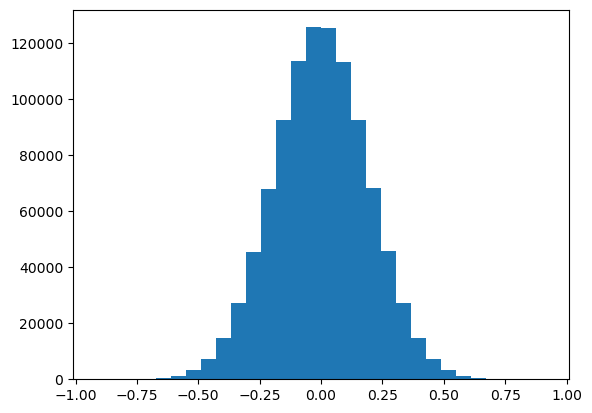

In [17]:
plt.hist(delta_x.flatten(), bins=30)

In [18]:
#Get the power spectrum
n_kF = 3
k_bins, pk_meas = get_power_spectrum(delta_x, side, spacing, n_kF=n_kF)

/home/andrewcats/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/andrewcats/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


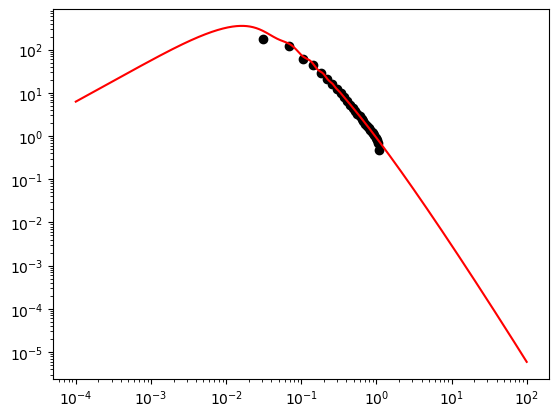

In [22]:
plt.loglog(k_bins, pk_meas, "o", color="black", label="Measured")
plt.loglog(kh, pk[0], color="red", label="Theory")

In [27]:
#Generate points
n_mean = 0.001 #energy density on particles (not a mass density)
Volume = side**3
N_part = Volume * n_mean

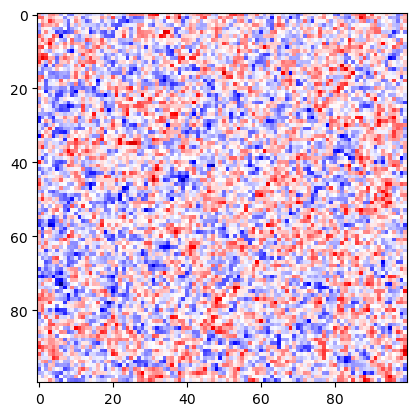

In [28]:
plt.imshow(delta_x[0], cmap="seismic", vmin=-1, vmax=1)


In [34]:
n_x = n_mean * (1 + delta_x)
Nobj_x = n_x * spacing**3

#plt.imshow(Nobj[:,:,0], cmap="seismic", vmin=-1, vmax=1)

In [36]:
#Import a discrete sample
#Pute the sample on a grid using NGP interpolation

(array([8.83043e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.09422e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.19200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.34000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00]),
 array([-1.        ,  0.06666667,  1.13333333,  2.2       ,  3.26666667,
         4.33333333,  5.4       ,  6.46666667,  7.53333333,  8.6       ,
         9.66666667, 10.73333333, 11.8       , 12.86666667, 13.93333333,
        15.        , 16.06666667, 17.13333333, 18.2       , 19.26666667,
        20.33333333, 21.4       , 22.46666667, 23.53333333, 24.6       ,
        25.66666667, 26.73333333, 27.8       , 28.86666667, 29.93333333,
        31.        ]),
 <BarContainer object of 30 artists>)

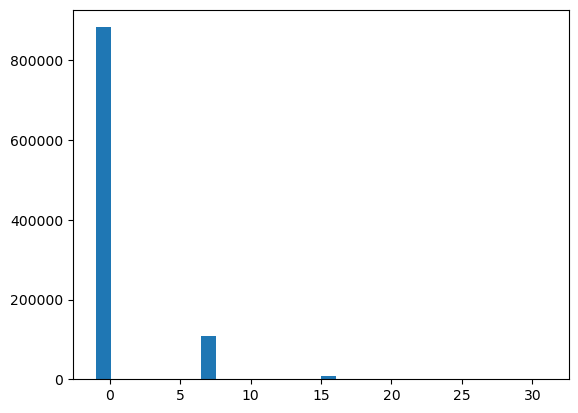

In [41]:
Npart = np.random.poisson(Nobj_x)
Npart.shape
N_mean = n_mean*spacing**3
delta_N_x = Npart/N_mean - 1
plt.hist(delta_N_x.flatten(), bins=30)

In [42]:
k_bin, pk_N_meas = get_power_spectrum(delta_N_x, side, spacing, n_kF=n_kF)

/home/andrewcats/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/andrewcats/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: 'numpy.ndarray' object is not callable

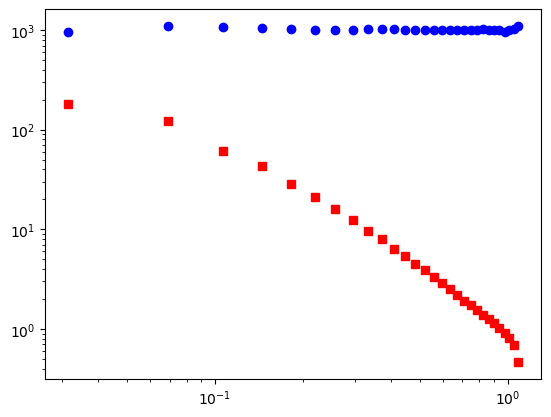

In [51]:
#misuro spettro di potenza
kF = 2*np.pi/side
kN = np.pi/spacing
plt.loglog(k_bins, pk_meas, "s", color="r")
plt.loglog(k_bin, pk_N_meas, "o", color="b")
plt.loglog(kh[(kh>k_bins[0]) & (kh<k_bins[-1])], pk[0](kh[(kh>k_bins[0]) & (kh<k_bins[-1])]+ 1/n_mean), color="black")
